<h1>Suppa ENSEMBL calculations</h1>

Ensembl release 75 is used for thease calculations

Software used:
- kallisto_linux-v0.42.1
- SalmonBeta-0.4.2_DebianSqueeze

In [1]:
# Importing the libraries

import os
from matplotlib import pyplot
from calc_funcs import *
from scipy.stats.stats import pearsonr
import os
from scipy.stats import ranksums
import numpy as np

%matplotlib inline

# Dimension setup
pyplot.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
# rank test functions and plot deffinitions

def get_points_n_diff(in_points):
    """
    Given a pairs of points returns absolute difference 
    and tuple of plot points
    """
    abs_difs = [abs(a - b) for a, b in in_points]
    cum_difs = np.cumsum(sorted(abs_difs))
    rel_dif = cum_difs / np.max(cum_difs)
    y_points = [x / len(rel_dif) for x in range(1, len(rel_dif) + 1)]
    return abs_difs, (rel_dif, y_points)

def plot_ranksumtest(subplot, group1,
                     group2, name1, name2, mtitle=''):
    """
    Plots rank sum test results.
    """
    axes = my_figure.add_subplot(121)
    
    subplot.step(*group1[1], label=name1);
    subplot.step(*group2[1], label=name2);
    subplot.legend(loc='best');
    subplot.set_title(mtitle + '\nWilcoxon rank-sum p-value is: {:.4f}'.format(ranksums(group1[0],group2[0])[1]))


def fetch_meandev_n_auc(points, diff):
    """
    Returns Average deviation and Area under curve
    """
    area = 0
    avr_dev = np.mean(points)
    x_ax = [0] + list(diff[0])
    y_ax = [0] + list(diff[1])
    
    for i in range(1, len(x_ax)):
        area += (x_ax[i] - x_ax[i-1]) * y_ax[i]
    return area, avr_dev

<h3>Salmon vs. Kallisto TPM comparisson</h3>

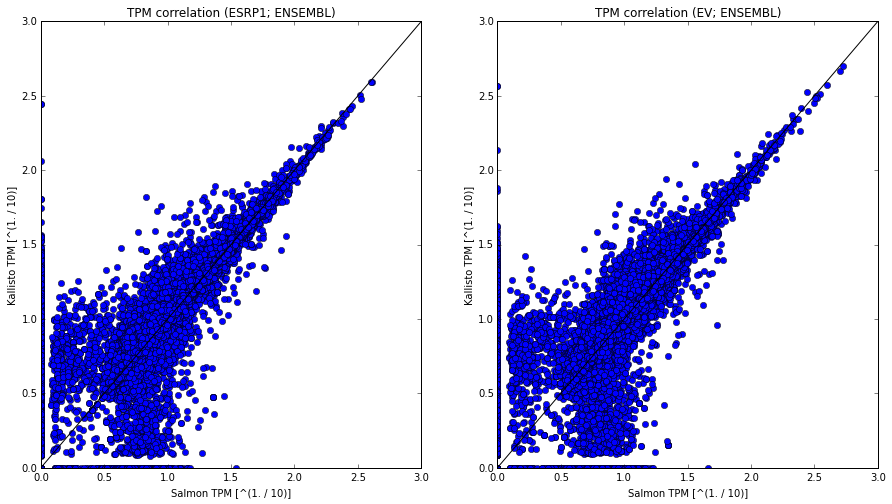

Pearson correlation of ESRP1: 0.8970
Pearson correlation of EV: 0.8794


In [3]:
def load_tpm(tpm_file):
    """
    Loads TMP values into dictionary
    """
    el_dict = {}
    with open(tpm_file) as handle:
        next(handle)
        for line in handle:
            line = line.strip().split()
            el_dict[line[0]] = float(line[1]) ** (1./10)
    return el_dict
                                     
def plot_graphs(axes, xpoints, ypoints, title):
    axes.plot(xpoints, ypoints, 'o');
    # axes.set_xlim(0, 1000)
    # axes.set_ylim(0, 1000)
    axes.set_xlabel('Salmon TPM [^(1. / 10)]')
    axes.set_ylabel('Kallisto TPM [^(1. / 10)]')
    axes.set_title(title)
    axes.plot([0, 3], [0, 3], 'black')
    
salmon_esrp1_refseq_tpm = load_tpm('../ensembl75_TPM/salmon_ensembl75_esrp1.tab')
salmon_ev_refseq_tpm = load_tpm('../ensembl75_TPM/salmon_ensembl75_ev.tab')


kallisto_esrp1_refseq_tpm = load_tpm('../ensembl75_TPM/kalisto_ensembl75_esrp1.tab')
kallisto_ev_refseq_tpm = load_tpm('../ensembl75_TPM/kalisto_ensembl75_ev.tab')


sa_point = []
ka_point = []
sa_point2 = []
ka_point2 = []

for id in salmon_esrp1_refseq_tpm:
    sa_point.append(salmon_esrp1_refseq_tpm[id])
    ka_point.append(kallisto_esrp1_refseq_tpm[id])
    sa_point2.append(salmon_ev_refseq_tpm[id])
    ka_point2.append(kallisto_ev_refseq_tpm[id])

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_graphs(axes, sa_point, ka_point, 'TPM correlation (ESRP1; ENSEMBL)')
plot_graphs(axes2, sa_point2, ka_point2,  'TPM correlation (EV; ENSEMBL)')
pyplot.show()


print('Pearson correlation of ESRP1: {:.4f}'.format(pearsonr(sa_point, ka_point)[0]))
print('Pearson correlation of EV: {:.4f}'.format(pearsonr(sa_point2, ka_point2)[0]))

<h3>Salmon vs. Kallisto PSI comparisson</h3>

ESRP1 SAMPLE:
PSI from salmon numbers:
	Points covered: 106 (64.6341 %; removed 9 point(s) duo to "duplicated" event)
PSI from kallisto numbers:
	Points covered: 106 (64.6341 %; removed 9 point(s) duo to "duplicated" event)

EV SAMPLE:
PSI from salmon numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)
PSI from kallisto numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)


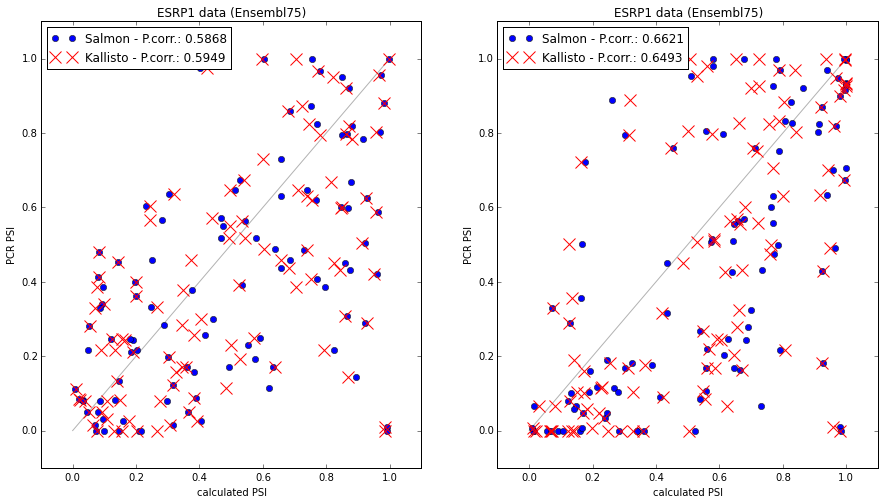

In [3]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('PSI from salmon numbers:')
suppa1_events = load_se_events('../psi/ensembl75/salmon_ensembl75_SE_esrp1.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events, table_file='../plot_tables/salmon_ensembl75_suppa_12_esrp1.tsv')
print('PSI from kallisto numbers:')
suppa2_events = load_se_events('../psi/ensembl75/kallisto_ensembl75_SE_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events, table_file='../plot_tables/kallisto_ensembl75_suppa_12_esrp1.tsv')
print()

print('EV SAMPLE:')
print('PSI from salmon numbers:')
suppa1_events = load_se_events('../psi/ensembl75/salmon_ensembl75_SE_ev.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events, table_file='../plot_tables/salmon_ensembl75_suppa_12_ev.tsv')
print('PSI from kallisto numbers:')
suppa2_events = load_se_events('../psi/ensembl75/kallisto_ensembl75_SE_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events, table_file='../plot_tables/kallisto_ensembl75_suppa_12_ev.tsv')

plot_corelation(axes, points1, points2, title='ESRP1 data (Ensembl75)',
                sam1_lab='Salmon', sam2_lab='Kallisto')
plot_corelation(axes2, points3, points4, title='ESRP1 data (Ensembl75)',
                sam1_lab='Salmon', sam2_lab='Kallisto')

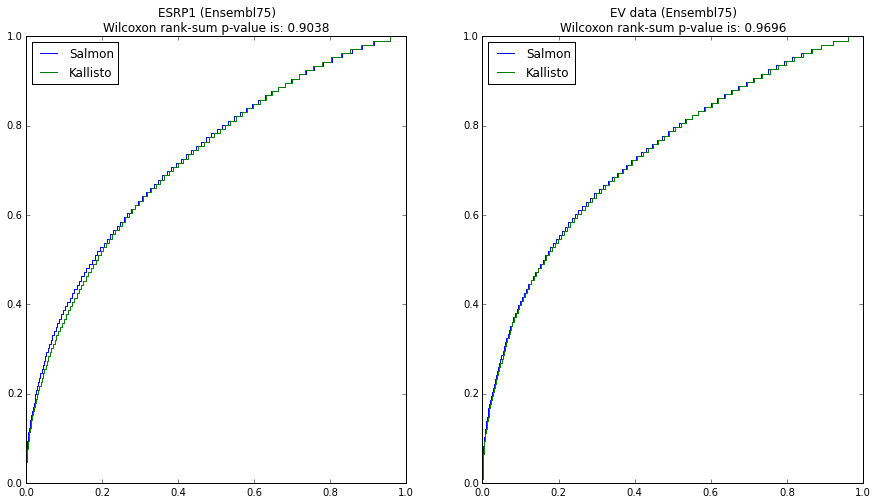


Graph1, sample1:
	Average Error is: 0.2200
	Area under curve is: 0.7309
Graph1, sample2:
	Average Error is: 0.2136
	Area under curve is: 0.7256
Graph2, sample1:
	Average Error is: 0.2283
	Area under curve is: 0.7368
Graph2, sample2:
	Average Error is: 0.2251
	Area under curve is: 0.7338


In [5]:

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'Salmon', 'Kallisto', mtitle='ESRP1 (Ensembl75)')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'Salmon', 'Kallisto', mtitle='EV data (Ensembl75)')
pyplot.show()
print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

<h3>Salmon correction test</h3>

Sallmon --biasCorrect flag test

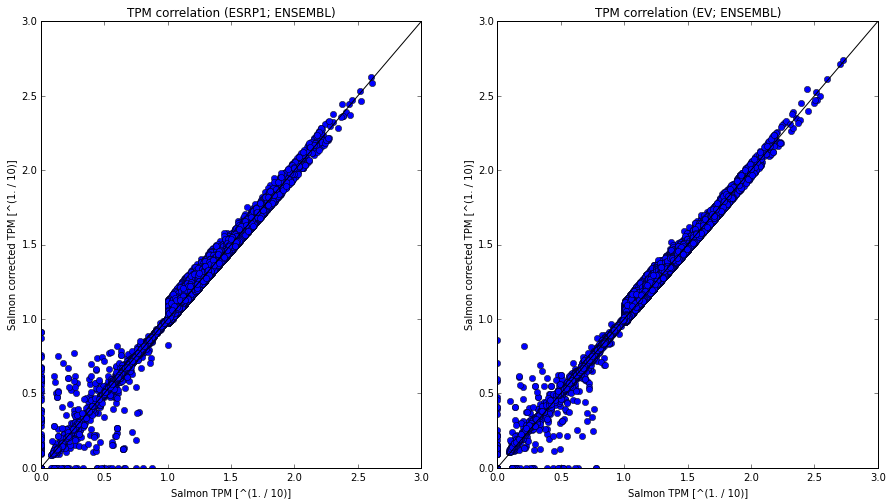

Pearson correlation of ESRP1: 0.9993
Pearson correlation of EV: 0.9995


In [6]:
def plot_graphs(axes, xpoints, ypoints, title):
    axes.plot(xpoints, ypoints, 'o');
    # axes.set_xlim(0, 1000)
    # axes.set_ylim(0, 1000)
    axes.set_xlabel('Salmon TPM [^(1. / 10)]')
    axes.set_ylabel('Salmon corrected TPM [^(1. / 10)]')
    axes.set_title(title)
    axes.plot([0, 3], [0, 3], 'black')

    
salmon_esrp1_ensembl_tpm = load_tpm('../ensembl75_TPM/salmon_ensembl75_esrp1.tab')
salmon_ev_ensembl_tpm = load_tpm('../ensembl75_TPM/salmon_ensembl75_ev.tab')


salmon_corrected_esrp1_ensembl_tpm = load_tpm('../ensembl75_TPM/salmon_ensembl75_corrected_esrp1.tab')
salmon_corrected_ev_ensembl_tpm = load_tpm('../ensembl75_TPM/salmon_ensembl75_corrected_ev.tab')


sa_point = []
ka_point = []
sa_point2 = []
ka_point2 = []

for id in salmon_esrp1_refseq_tpm:
    sa_point.append(salmon_esrp1_ensembl_tpm[id])
    ka_point.append(salmon_corrected_esrp1_ensembl_tpm[id])
    sa_point2.append(salmon_ev_ensembl_tpm[id])
    ka_point2.append(salmon_corrected_ev_ensembl_tpm[id])

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_graphs(axes, sa_point, ka_point, 'TPM correlation (ESRP1; ENSEMBL)')
plot_graphs(axes2, sa_point2, ka_point2,  'TPM correlation (EV; ENSEMBL)')
pyplot.show()


print('Pearson correlation of ESRP1: {:.4f}'.format(pearsonr(sa_point, ka_point)[0]))
print('Pearson correlation of EV: {:.4f}'.format(pearsonr(sa_point2, ka_point2)[0]))

ESRP1 SAMPLE:
PSI from salmon numbers:
	Points covered: 106 (64.6341 %; removed 9 point(s) duo to "duplicated" event)
PSI from salmon corrected numbers:
	Points covered: 106 (64.6341 %; removed 9 point(s) duo to "duplicated" event)

EV SAMPLE:
PSI from salmon numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)
PSI from salmon corrected numbers:
	Points covered: 108 (65.8537 %; removed 9 point(s) duo to "duplicated" event)


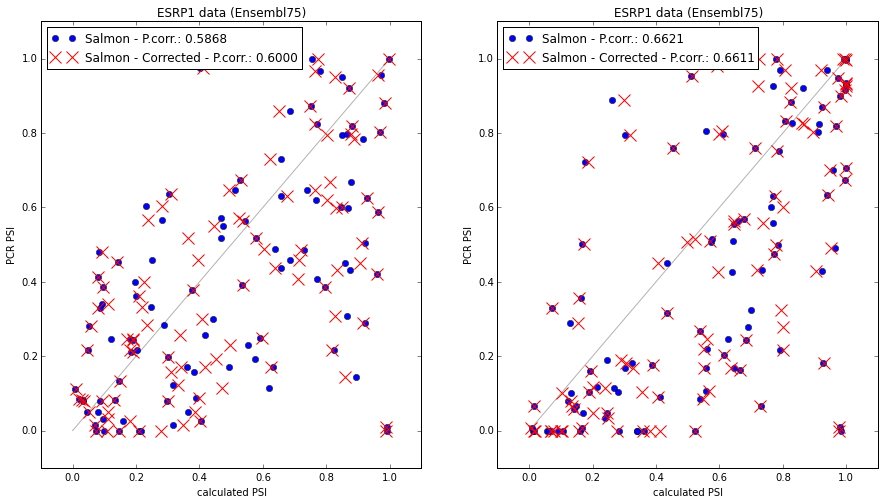

In [7]:
# makes setup
my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)

pcr_esrp1_events, pcr_ev_events = collect_pcr_psi()

print('ESRP1 SAMPLE:')
print('PSI from salmon numbers:')
suppa1_events = load_se_events('../psi/ensembl75/salmon_ensembl75_SE_esrp1.psi')
points1 = make_points_pairs(pcr_esrp1_events, suppa1_events)
print('PSI from salmon corrected numbers:')
suppa2_events = load_se_events('../psi/ensembl75/salmon_corrected_ensembl75_SE_esrp1.psi')
points2 = make_points_pairs(pcr_esrp1_events, suppa2_events)
print()

print('EV SAMPLE:')
print('PSI from salmon numbers:')
suppa1_events = load_se_events('../psi/ensembl75/salmon_ensembl75_SE_ev.psi')
points3 = make_points_pairs(pcr_ev_events, suppa1_events)
print('PSI from salmon corrected numbers:')
suppa2_events = load_se_events('../psi/ensembl75/salmon_corrected_ensembl75_SE_ev.psi')
points4 = make_points_pairs(pcr_ev_events, suppa2_events)

plot_corelation(axes, points1, points2, title='ESRP1 data (Ensembl75)',
                sam1_lab='Salmon', sam2_lab='Salmon - Corrected')
plot_corelation(axes2, points3, points4, title='ESRP1 data (Ensembl75)',
                sam1_lab='Salmon', sam2_lab='Salmon - Corrected')

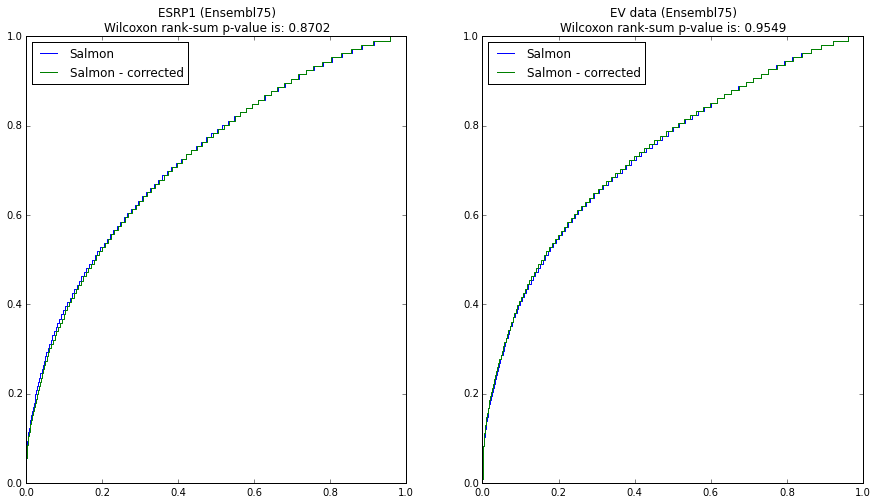


Graph1, sample1:
	Average Error is: 0.2200
	Area under curve is: 0.7309
Graph1, sample2:
	Average Error is: 0.2132
	Area under curve is: 0.7286
Graph2, sample1:
	Average Error is: 0.2283
	Area under curve is: 0.7368
Graph2, sample2:
	Average Error is: 0.2277
	Area under curve is: 0.7390


In [8]:

my_figure = pyplot.figure()
axes = my_figure.add_subplot(121)
axes2 = my_figure.add_subplot(122)


plot_ranksumtest(axes, get_points_n_diff(points1), get_points_n_diff(points2),
                 'Salmon', 'Salmon - corrected', mtitle='ESRP1 (Ensembl75)')

plot_ranksumtest(axes2, get_points_n_diff(points3), get_points_n_diff(points4),
                 'Salmon', 'Salmon - corrected', mtitle='EV data (Ensembl75)')
pyplot.show()
print()

ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points1))
print('Graph1, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points2))
print('Graph1, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points3))
print('Graph2, sample1:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))
ac, ad = fetch_meandev_n_auc(*get_points_n_diff(points4))
print('Graph2, sample2:\n\tAverage Error is: {:.4f}\n\tArea under curve is: {:.4f}'.format(ad, ac))

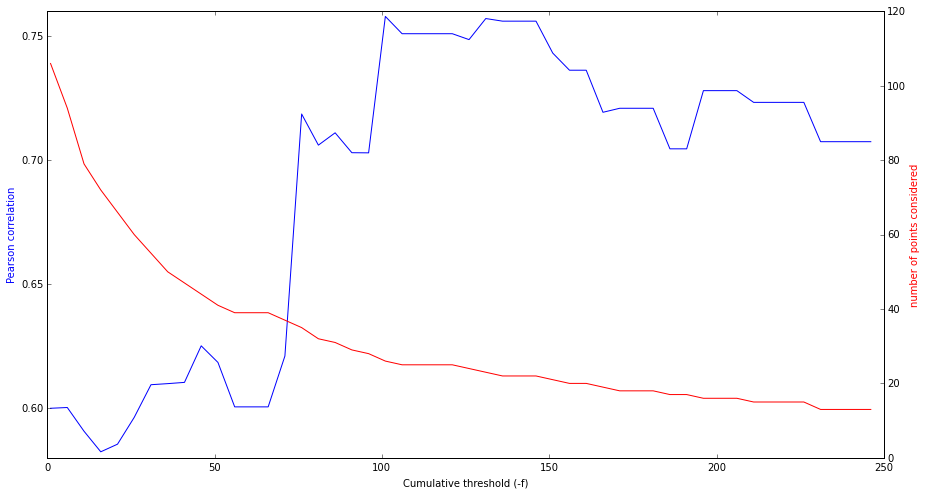

Suppa 1.2 Event results based on different Cumulative treshold.
Calculated from ENSEMBL75 annotation with ESRP1 Salmon (corrected) dataset.


In [9]:
savepath = '../psi/ensembl75_fparam/'
points = []
for my_file in os.listdir(savepath):
    if my_file.endswith('.gtf'):
        continue
    suppa1_events = load_se_events(savepath + my_file)
    points1 = make_points_pairs(pcr_esrp1_events, suppa1_events, verbose=False)
    number = (int(my_file[31:-4]))
    cor = pearsonr(*zip(*points1))[0]
    points.append((number, cor, len(points1)))

x, y, z = zip(*sorted(points))
fig, ax1 = pyplot.subplots()
ax1.plot(x, y, 'b-')
ax1.set_xlabel('Cumulative threshold (-f)')
ax1.set_ylabel('Pearson correlation', color='b')

ax2 = ax1.twinx()
ax2.plot(x, z, 'r')
ax2.set_ylabel('number of points considered', color='r')
pyplot.show()
print('Suppa 1.2 Event results based on different Cumulative treshold.\n'
      'Calculated from ENSEMBL75 annotation with ESRP1 Salmon (corrected) dataset.')